In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import plotly.graph_objs as go
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Import Training Data

In [2]:
train = pd.read_pickle("train.pkl")

In [3]:
sns.set_style("whitegrid", {'axes.grid' : False})

In [4]:
train

,ticker,assets,capex,ncfbus,ncfinv,ncff,ncfdebt,ncfcommon,ncfdiv,ncfi,ncfo,liabilities,debtusd,ebitdausd,netinccmnusd,equityusd,revenueusd,cashnequsd,marketcap,ev,name,exchange,industry,location,firm_name,scalemarketcap,scalerevenue,firm,ncfbus_abs,ncfinv_abs,ncff_abs,ncfdebt_abs,ncfcommon_abs,ncfdiv_abs,ncfi_abs,ncfo_abs,ncfbus_io,ncfinv_io,ncff_io,ncfdebt_io,ncfcommon_io,ncfdiv_io,ncfi_io,ncfo_io,scalemarketcap_cat,scalerevenue_cat,exchange_NASDAQ,exchange_NYSE,exchange_NYSEARCA,exchange_NYSEMKT,exchange_OTC,industry_Aerospace & Defense,industry_Agricultural Inputs,industry_Airlines,industry_Airports & Air Services,industry_Aluminum,industry_Apparel Manufacturing,industry_Apparel Retail,industry_Apparel Stores,industry_Asset Management,industry_Auto & Truck Dealerships,industry_Auto Manufacturers,industry_Auto Parts,industry_Banks - Diversified,industry_Banks - Regional,industry_Beverages - Brewers,industry_Beverages - Non-Alcoholic,industry_Beverages - Soft Drinks,industry_Beverages - Wineries & Distilleries,industry_Biotechnology,industry_Broadcasting,industry_Building Materials,industry_Building Products & Equipment,industry_Business Equipment & Supplies,industry_Business Services,industry_Capital Markets,industry_Chemicals,industry_Coking Coal,industry_Communication Equipment,industry_Computer Hardware,industry_Confectioners,industry_Conglomerates,industry_Consulting Services,industry_Consumer Electronics,industry_Credit Services,industry_Department Stores,industry_Diagnostics & Research,industry_Discount Stores,industry_Diversified Industrials,industry_Drug Manufacturers - General,industry_Drug Manufacturers - Major,industry_Drug Manufacturers - Specialty & Generic,industry_Education & Training Services,industry_Electrical Equipment & Parts,industry_Electronic Components,industry_Electronic Gaming & Multimedia,industry_Electronics & Computer Distribution,industry_Engineering & Construction,industry_Entertainment,industry_Farm & Heavy Construction Machinery,industry_Farm Products,industry_Financial Conglomerates,industry_Financial Data & Stock Exchanges,industry_Financial Exchanges,industry_Food Distribution,industry_Footwear & Accessories,industry_Furnishings,industry_Furnishings Fixtures & Appliances,industry_Gambling,industry_Gold,industry_Grocery Stores,industry_Health Information Services,industry_Healthcare Plans,industry_Home Improvement Retail,industry_Household & Personal Products,industry_Industrial Distribution,industry_Information Technology Services,industry_Infrastructure Operations,industry_Insurance - Diversified,industry_Insurance - Life,industry_Insurance - Property & Casualty,industry_Insurance - Reinsurance,industry_Insurance - Specialty,industry_Insurance Brokers,industry_Integrated Freight & Logistics,industry_Internet Content & Information,industry_Internet Retail,industry_Leisure,industry_Lodging,industry_Long-Term Care Facilities,industry_Lumber & Wood Production,industry_Luxury Goods,industry_Marine Shipping,industry_Media - Diversified,industry_Medical Care Facilities,industry_Medical Devices,industry_Medical Distribution,industry_Medical Instruments & Supplies,industry_Metal Fabrication,industry_Mortgage Finance,industry_Oil & Gas Drilling,industry_Oil & Gas E&P,industry_Oil & Gas Equipment & Services,industry_Oil & Gas Integrated,industry_Oil & Gas Midstream,industry_Oil & Gas Refining & Marketing,industry_Other Industrial Metals & Mining,industry_Packaged Foods,industry_Packaging & Containers,industry_Paper & Paper Products,industry_Personal Services,industry_Pharmaceutical Retailers,industry_Pollution & Treatment Controls,industry_Publishing,industry_REIT - Diversified,industry_REIT - Healthcare Facilities,industry_REIT - Hotel & Motel,industry_REIT - Industrial,industry_REIT - Mortgage,industry_REIT - Office,industry_REIT - Residential,industry_REIT - Retail,industry_REIT - Specialty,industry_Railroads,industry_Real Estate - Development,industry_Real Estate - Diversified,industry_Real Esta

## Check For Imbalanced Data

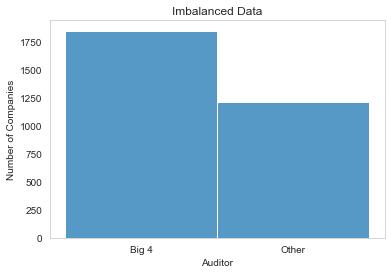

In [10]:
sns.histplot(train['firm'])
plt.xlabel("Auditor")
plt.ylabel("Number of Companies")
plt.title("Imbalanced Data");

## Visualize Industry Data

In [5]:
big_four = pd.DataFrame(train[train.firm=="Big 4"].groupby(['industry', 'firm'])['name'].count())
big_four.reset_index(inplace=True)
other = pd.DataFrame(train[train.firm=="Other"].groupby(['industry', 'firm'])['name'].count())
other.reset_index(inplace=True)
big_four_other = pd.merge(big_four, other, how='outer', on='industry')
big_four_other = big_four_other[['industry', 'name_x', 'name_y']]
big_four_other.rename(columns={"name_x":"Big_Four", "name_y": "Other"}, inplace=True)
big_four_other.fillna(value=0, inplace=True)
big_four_other["Total"] = big_four_other.Big_Four + big_four_other.Other
big_four_other["Big_Four_Percent"] = big_four_other.Big_Four/big_four_other.Total
big_four_other["Big_Four_Other"] = big_four_other.Other/big_four_other.Total
big_four_other

,industry,Big_Four,Other,Total,Big_Four_Percent,Big_Four_Other
0,Advertising Agencies,8.00,8.00,16.00,0.50,0.50
1,Aerospace & Defense,24.00,13.00,37.00,0.65,0.35
2,Agricultural Inputs,7.00,5.00,12.00,0.58,0.42
3,Airlines,7.00,0.00,7.00,1.00,0.00
4,Airports & Air Services,1.00,1.00,2.00,0.50,0.50
...,...,...,...,...,...,...
147,Long-Term Care Facilities,0.00,1.00,1.00,0.00,1.00
148,Media - Diversified,0.00,1.00,1.00,0.00,1.00
149,Real Estate - Diversified,0.00,6.00,6.00,0.00,1.00
150,Savings & Cooperative Banks,0.00,1.00,1.00,0.00,1.00


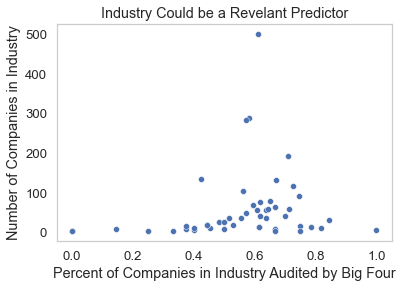

In [34]:
sns.scatterplot(data=big_four_other, x="Big_Four_Percent", y="Total")
plt.xlabel("Percent of Companies in Industry Audited by Big Four")
plt.ylabel("Number of Companies in Industry")
plt.title("Industry Could be a Revelant Predictor");

## Visualize Location Data

In [7]:
big_four = pd.DataFrame(train[train.firm=="Big 4"].groupby(['State', 'Country', 'firm'])['name'].count())
big_four.reset_index(inplace=True)
big_four = big_four[big_four.Country.str.contains('U.S.A')]
other = pd.DataFrame(train[train.firm=="Other"].groupby(['State', 'Country', 'firm'])['name'].count())
other.reset_index(inplace=True)
other = other[other.Country.str.contains('U.S.A')]
big_four_other = pd.merge(big_four, other, how='outer', on='State')
big_four_other = big_four_other[['State', 'name_x', 'name_y']]
big_four_other.rename(columns={"State":"state", "name_x":"Big_Four", "name_y": "Other"}, inplace=True)
big_four_other.fillna(value=0, inplace=True)
big_four_other["Total"] = big_four_other.Big_Four + big_four_other.Other
big_four_other["Big_Four_Percent"] = big_four_other.Big_Four/big_four_other.Total
big_four_other["Big_Four_Other"] = big_four_other.Other/big_four_other.Total
big_four_other

,state,Big_Four,Other,Total,Big_Four_Percent,Big_Four_Other
0,Alabama,5.00,6.00,11.00,0.45,0.55
1,Arizona,26.00,16.00,42.00,0.62,0.38
2,Arkansas,8.00,5.00,13.00,0.62,0.38
3,California,307.00,195.00,502.00,0.61,0.39
4,Colorado,47.00,29.00,76.00,0.62,0.38
5,Connecticut,42.00,17.00,59.00,0.71,0.29
6,Delaware,9.00,2.00,11.00,0.82,0.18
7,District Of Columbia,5.00,0.00,5.00,1.00,0.00
8,Florida,57.00,78.00,135.00,0.42,0.58
9,Georgia,41.00,28.00,69.00,0.59,0.41


In [8]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
location_df = pd.merge(contiguous_usa, big_four_other, how='left', on="state")

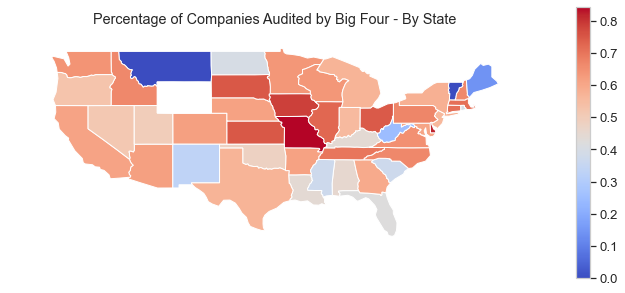

In [33]:
plt.rcParams.update({'font.size': 22})

ax = gplt.choropleth(location_df, hue='Big_Four_Percent', cmap='coolwarm',
                     legend=True, legend_kwargs={'shrink': 0.5},  figsize=(12, 10))
ax.set_title("Percentage of Companies Audited by Big Four - By State");

## Visualize Balance Sheet Data

In [11]:
cols_to_pairplt = train[['assets', 'liabilities', 'debtusd', 'equityusd', 'cashnequsd', 'firm']].copy()
cols_to_pairplt

,assets,liabilities,debtusd,equityusd,cashnequsd,firm
3143,98415500.00,30139250.00,224250.00,68276250.00,29437000.00,Big 4
947,3497823250.00,2072228500.00,1663351000.00,1425594750.00,70835500.00,Big 4
5,427241750.00,136354750.00,80894000.00,290887000.00,65236000.00,Other
1806,538906250.00,134445500.00,80002000.00,404460750.00,14839250.00,Big 4
1876,56666138.00,10309424.67,829719.00,46049441.33,22315762.33,Other
...,...,...,...,...,...,...
2467,14807230750.00,13504109500.00,13360335500.00,1301265500.00,100308000.00,Other
178,577449396.33,209438034.67,92155022.00,177942442.67,109303563.67,Other
166,504744000.00,268365333.33,80047000.00,234026666.67,99225000.00,Big 4
3770,4892811000.00,2371947200.00,1445863800.00,2520863800.00,1394406400.00,Big 4


In [12]:
outliers_removed = cols_to_pairplt[(np.abs(stats.zscore(cols_to_pairplt[['assets', 'liabilities', 'debtusd', 'equityusd', 'cashnequsd']])) < 1).all(axis=1)]

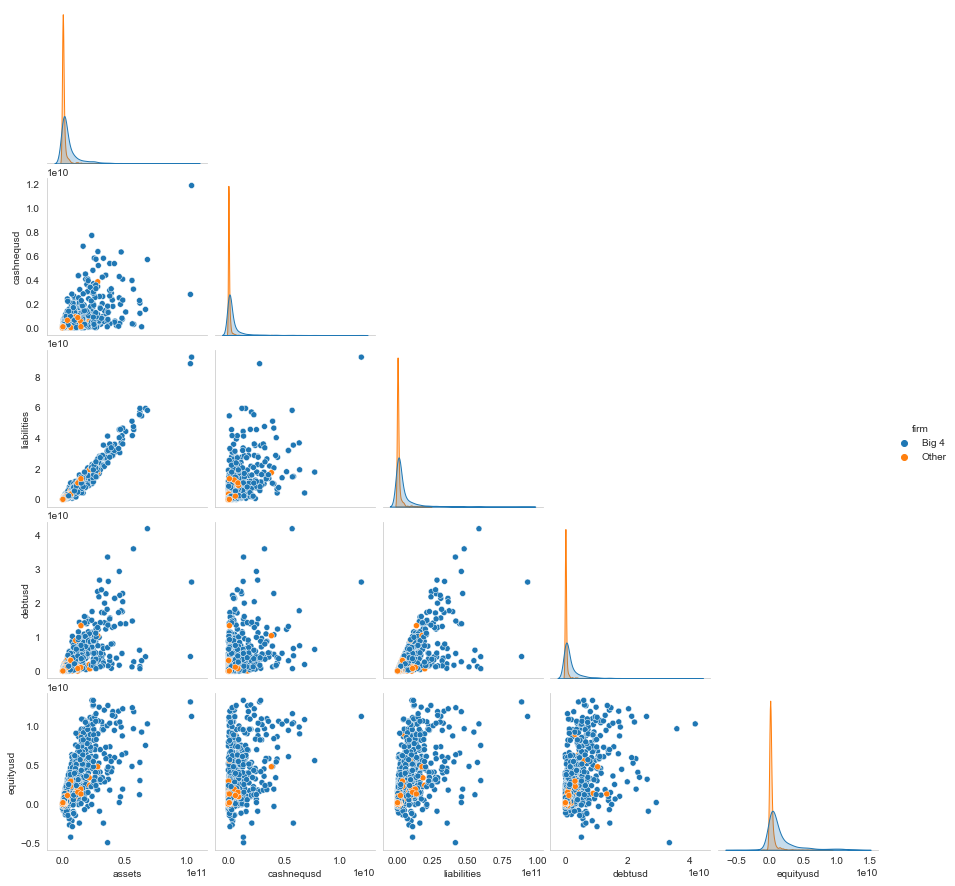

In [13]:
sns.pairplot(outliers_removed, vars=['assets', 'cashnequsd', 'liabilities', 'debtusd', 'equityusd'], hue='firm', corner=True);

## Visualize Cash Flow Data

In [14]:
cols_to_pairplt = train[['capex', 'ncfbus_abs', 'ncfinv_abs', 'ncff_abs', 'ncfdebt_abs', 'ncfcommon_abs', 'ncfdiv_abs', 'ncfi_abs', 'ncfo_abs', 'firm']].copy()
cols_to_pairplt

,capex,ncfbus_abs,ncfinv_abs,ncff_abs,ncfdebt_abs,ncfcommon_abs,ncfdiv_abs,ncfi_abs,ncfo_abs,firm
3143,-133000.00,0.00,7339000.00,43555750.00,0.00,43554750.00,0.00,7193000.00,50417750.00,Big 4
947,-120551000.00,79155000.00,805750.00,139441000.00,81923500.00,993500.00,217385500.00,195599000.00,348490500.00,Big 4
5,-56661500.00,0.00,1949000.00,25071250.00,15447750.00,12815500.00,0.00,55083000.00,38415750.00,Other
1806,-30791750.00,0.00,12600750.00,7087000.00,21208500.00,14846500.00,0.00,18191000.00,28140750.00,Big 4
1876,-2115731.33,126666.67,143371.00,1625826.00,32.33,3567715.00,1132500.00,2357991.67,7283837.67,Other
...,...,...,...,...,...,...,...,...,...,...
2467,-220250.00,19589250.00,462387750.00,419760750.00,201320000.00,269728750.00,115063750.00,452141250.00,35613500.00,Other
178,-1432168.00,4268890.67,54246496.33,45726273.33,82262261.33,4029202.67,29974699.33,65947555.00,30366267.00,Other
166,-7947000.00,81580000.00,0.00,129668000.00,45353333.33,86166333.33,0.00,88966666.67,27904666.67,Big 4
3770,-74861400.00,137759200.00,442177600.00,977819600.00,70965000.00,508254000.00,348124000.00,201583600.00,953262200.00,Big 4


In [15]:
outliers_removed = cols_to_pairplt[(np.abs(stats.zscore(cols_to_pairplt[['capex', 'ncfbus_abs', 'ncfinv_abs', 'ncff_abs', 'ncfdebt_abs', 'ncfcommon_abs', 'ncfdiv_abs', 'ncfi_abs', 'ncfo_abs']])) < 1).all(axis=1)]

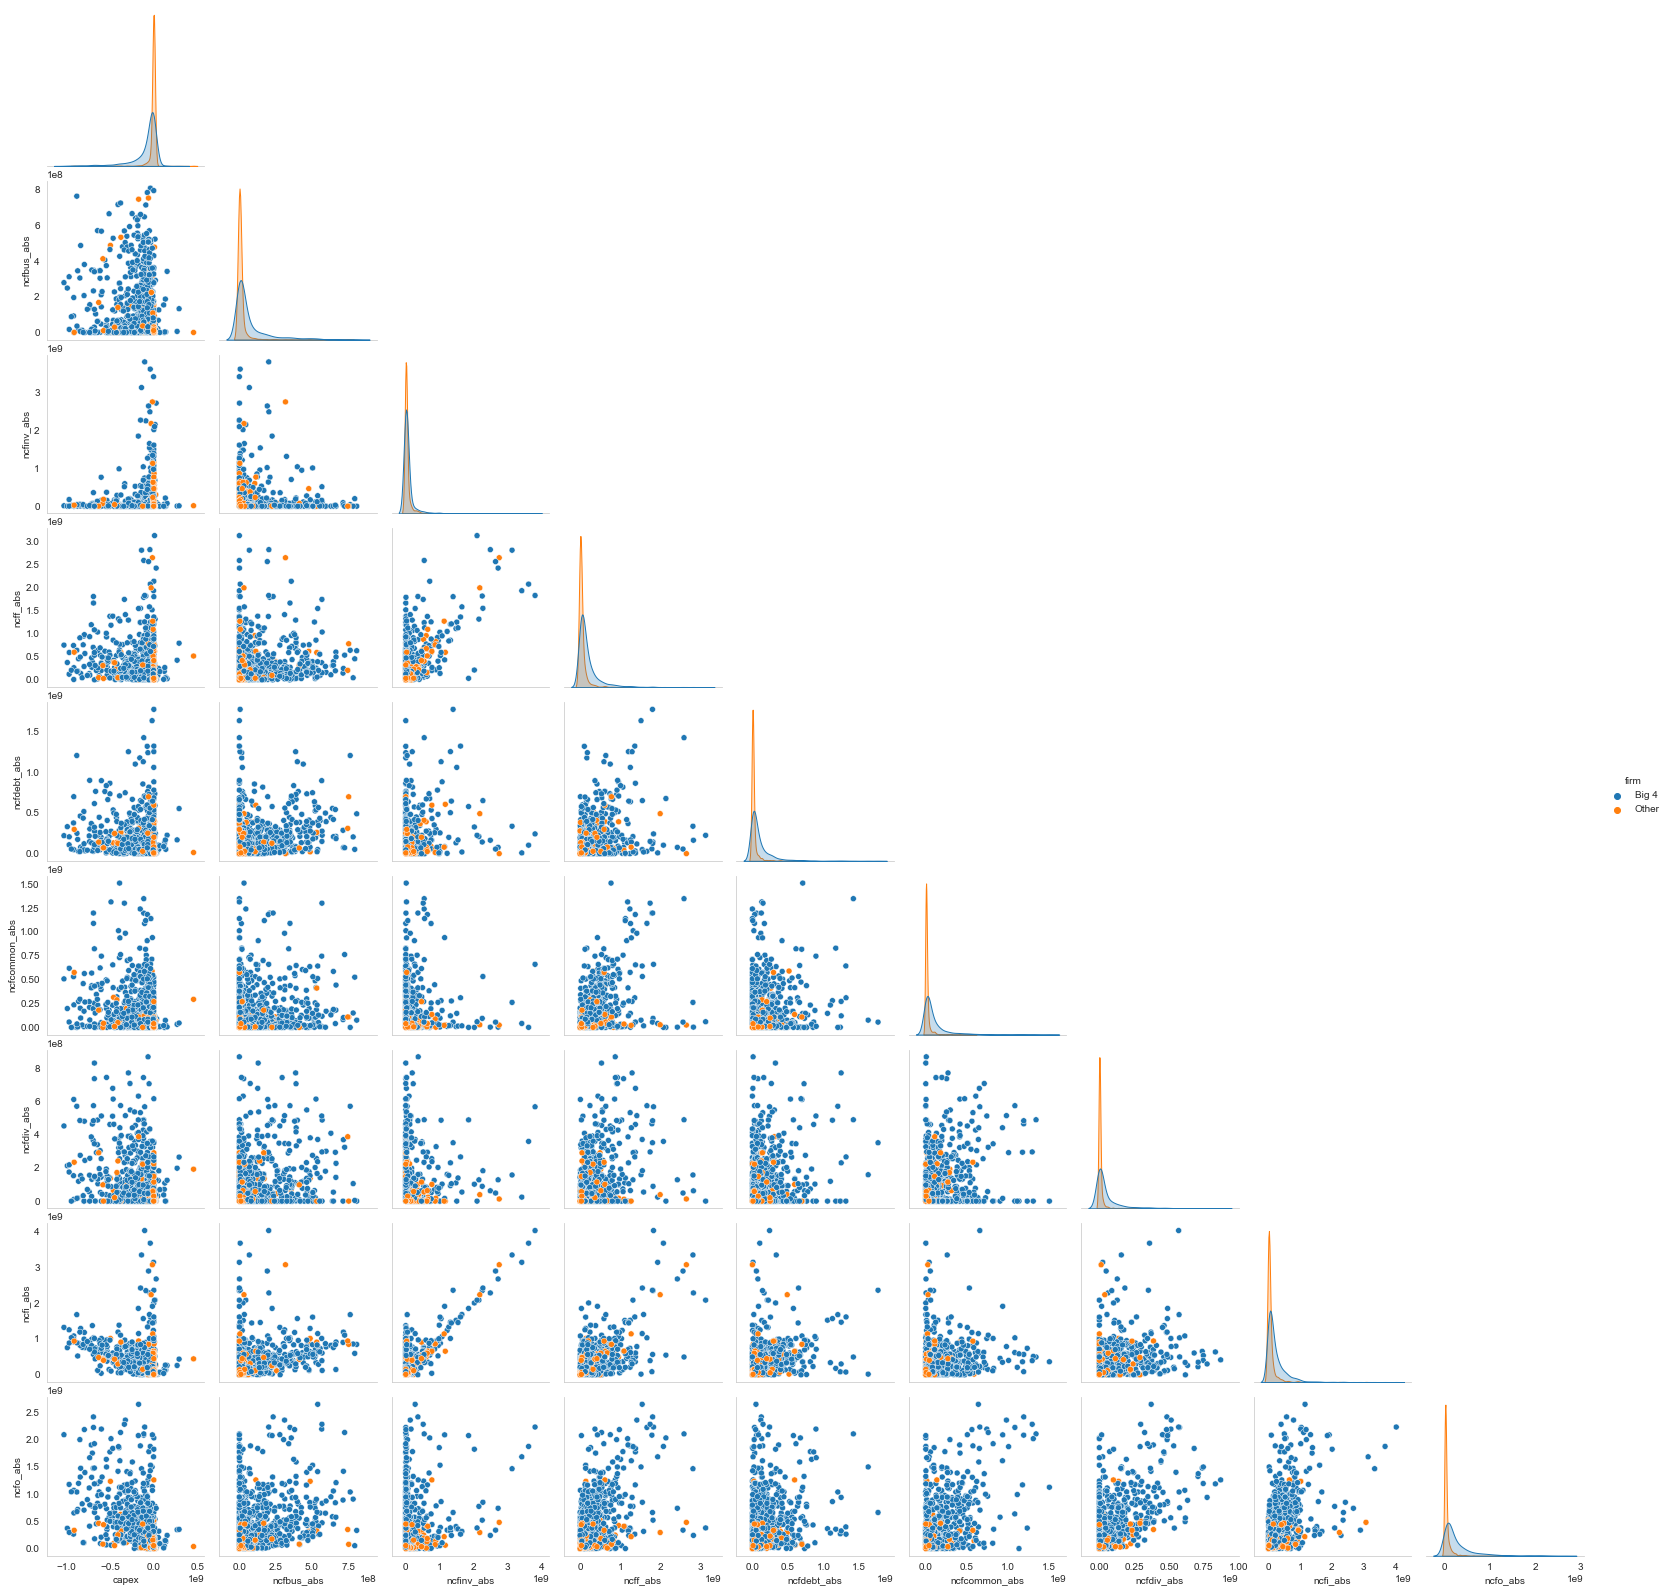

In [16]:
sns.pairplot(outliers_removed, vars=['capex', 'ncfbus_abs', 'ncfinv_abs', 'ncff_abs', 'ncfdebt_abs', 'ncfcommon_abs', 'ncfdiv_abs', 'ncfi_abs', 'ncfo_abs'], hue='firm', corner=True);

In [17]:
cols_to_pairplt = train[['ncfbus_io', 'ncfinv_io', 'ncff_io', 'ncfdebt_io', 'ncfcommon_io', 'ncfdiv_io', 'ncfi_io', 'ncfo_io', 'firm']].copy()
cols_to_pairplt

,ncfbus_io,ncfinv_io,ncff_io,ncfdebt_io,ncfcommon_io,ncfdiv_io,ncfi_io,ncfo_io,firm
3143,1,1,1,1,1,1,1,0,Big 4
947,0,1,0,1,0,0,0,1,Big 4
5,1,1,1,1,1,1,0,1,Other
1806,1,1,0,0,1,1,0,1,Big 4
1876,0,0,1,1,1,0,0,1,Other
...,...,...,...,...,...,...,...,...,...
2467,1,0,1,1,1,0,0,1,Other
178,0,0,1,1,0,0,0,1,Other
166,0,1,1,1,1,1,0,1,Big 4
3770,0,1,0,0,0,0,1,1,Big 4


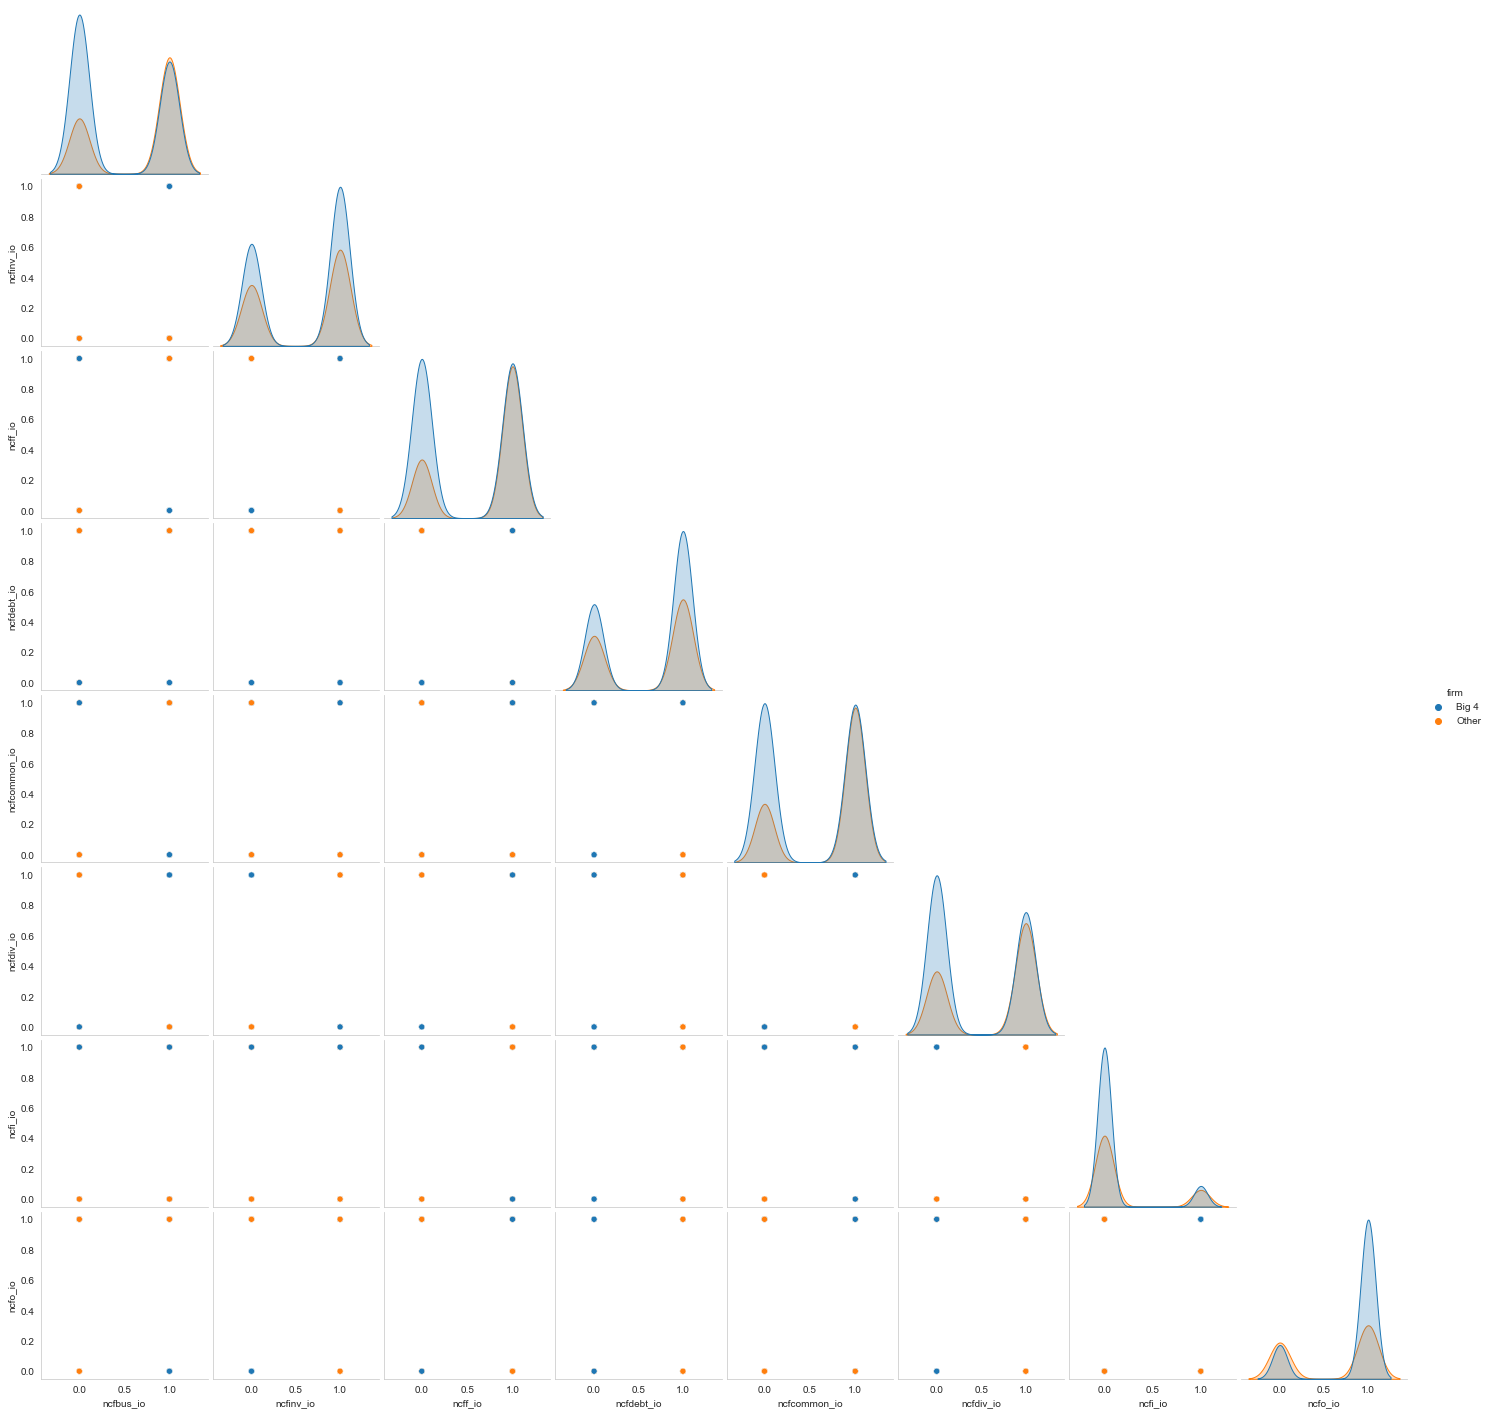

In [18]:
sns.pairplot(cols_to_pairplt, vars=['ncfbus_io', 'ncfinv_io', 'ncff_io', 'ncfdebt_io', 'ncfcommon_io', 'ncfdiv_io', 'ncfi_io', 'ncfo_io'], hue='firm', corner=True);

## Visualize Earnings Data

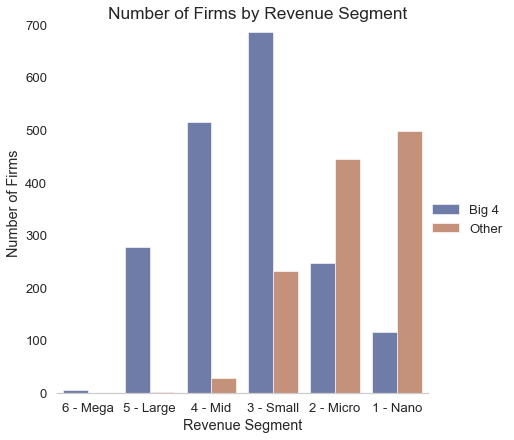

In [30]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid", {'axes.grid' : False})

g = sns.catplot(
    data=train,
    x="scalerevenue", kind="count", hue="firm",
    ci="sd", palette="dark", alpha=.6, height=6,
    order=["6 - Mega", "5 - Large", "4 - Mid", "3 - Small", "2 - Micro", "1 - Nano"]
)

g.despine(left=True)
g.set_axis_labels("Revenue Segment", "Number of Firms")
g.legend.set_title("")
g.fig.suptitle("Number of Firms by Revenue Segment");

## Visualize Market Data

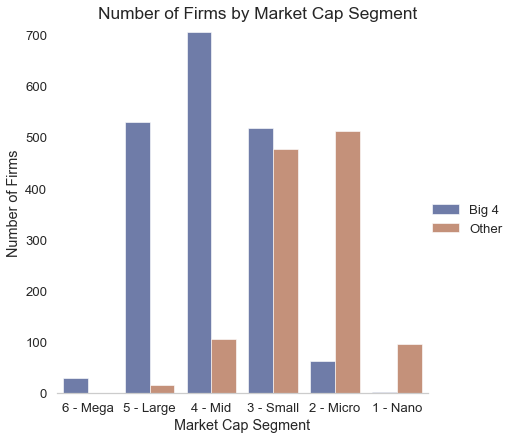

In [31]:
g = sns.catplot(
    data=train,
    x="scalemarketcap", kind="count", hue="firm",
    ci="sd", palette="dark", alpha=.6, height=6,
    order=["6 - Mega", "5 - Large", "4 - Mid", "3 - Small", "2 - Micro", "1 - Nano"]
)

g.despine(left=True)
g.set_axis_labels("Market Cap Segment", "Number of Firms")
g.legend.set_title("")
g.fig.suptitle("Number of Firms by Market Cap Segment");

## Visualize Exchange Data

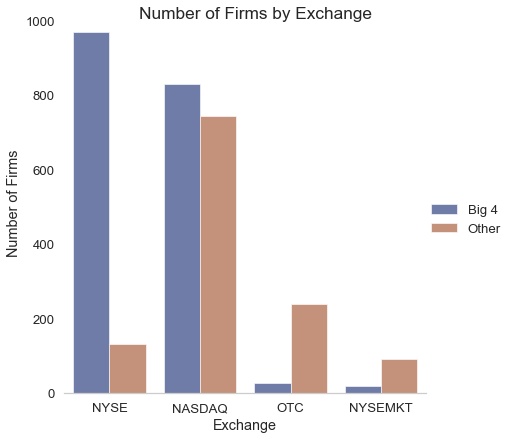

In [32]:
g = sns.catplot(
    data=train,
    x="exchange", kind="count", hue="firm",
    ci="sd", palette="dark", alpha=.6, height=6,
    order=["NYSE", "NASDAQ", "OTC", "NYSEMKT"]
)

g.despine(left=True)
g.set_axis_labels("Exchange", "Number of Firms")
g.legend.set_title("")
g.fig.suptitle("Number of Firms by Exchange");